IMAGE to TEXT Machine Learning Model Implementation

Number of images: 60000
Image dimensions: 28x28
Labels: 60000
Label for the 0th image: 5


Text(0.5, 1.0, '0th Image - Label: 5')

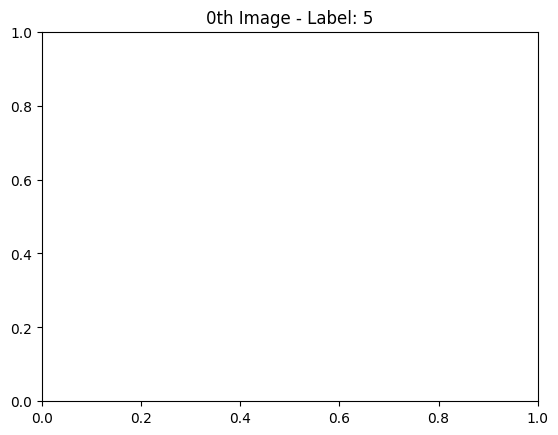

In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt

def read_idx3_ubyte(file_path_p):
    with open(file_path_p, 'rb') as f:
        magic_number, num_images, num_rows, num_cols = struct.unpack(">IIII", f.read(16))
        
        if magic_number != 2051:
            raise ValueError("Invalid magic number, not an IDX3 file!")
        
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape((num_images, num_rows, num_cols))
        
        return images

def read_idx1_ubyte(file_path_p):
    with open(file_path_p, 'rb') as f:
        magic_number, num_items = struct.unpack(">II", f.read(8))
        if magic_number != 2049:
            raise ValueError("Invalid magic number, not an IDX1 file!")
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

label_path = "train-labels.idx1-ubyte"
labels_dataset = read_idx1_ubyte(label_path)
file_path = "train-images.idx3-ubyte"
images_dataset = read_idx3_ubyte(file_path)

print(f"Number of images: {images_dataset.shape[0]}")
print(f"Image dimensions: {images_dataset.shape[1]}x{images_dataset.shape[2]}")
print(f"Labels: {labels_dataset.shape[0]}")
print(f"Label for the {0}th image: {labels_dataset[0]}")
plt.title(f"{0}th Image - Label: {labels_dataset[0]}")

The Above Code is to load the data set from .IDX-ubyte

In [ ]:
import random

xint = random.randint(0, images_dataset.shape[0])
plt.imsave(f"random_image_{xint}.png", images_dataset[xint], cmap='gray')

plt.imshow(images_dataset[xint], cmap='gray')
plt.title(f"{xint} th Image")
plt.show()

In [ ]:
#Flattening the images_dataset to a 1D array to represent in Binaries.
import pandas as pd

flattened_images = images_dataset.reshape(images_dataset.shape[0], -1)
images_show = pd.DataFrame(flattened_images)

print(images_show.head())

In [ ]:
from sklearn.model_selection import train_test_split

X = flattened_images
Y = labels_dataset

#X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Now we will use Decision Trees for image classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier(max_depth=15, random_state=42)
dtc.fit(X_train, Y_train)

In [ ]:
y_pred = dtc.predict(X_test)
print(y_pred)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Decision Tree Test Accuracy: {accuracy * 100:.2f}%")

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap='Blues')
plt.show()

In [ ]:
plt.bar(range(flattened_images.shape[1]), dtc.feature_importances_)
plt.title("Feature Importance")
plt.show()

Now we will try RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)

In [ ]:
y_pred = rfc.predict(X_test)
print(y_pred)

In [ ]:
print(f"Random Forest Accuracy: {accuracy_score(Y_test, y_pred) * 100:.2f}%")

In [ ]:
print("Classification Report After Random Forest:")
print(classification_report(Y_test, y_pred))

In [ ]:
plt.bar(range(flattened_images.shape[1]), dtc.feature_importances_)
plt.title("Feature Importance")
plt.show()

We have a result of 97% with the RandomForest Classifier Model & 87% with the DecisionTree Model.

We will use some external images to test this model.

In [ ]:
from PIL import Image

im_path = "random_image_47949.png"
img = Image.open(im_path).convert("L")
img = img.resize((28, 28))

In [ ]:
image_array = np.array(img).reshape(1, -1)

predict_number = rfc.predict(image_array)
print(f"Predicted Label: {predict_number[0]}")

In [ ]:
plt.imshow(img, cmap="gray")
plt.title(f"Predicted Label: {predict_number[0]}")
plt.show()

The Model Successfully Predicts The Number (%)

In [ ]:
import joblib
joblib.dump(dtc, 'Image-to-text/decision_tree_model.pkl')
joblib.dump(rfc, 'randomforest_model.pkl')